# 资源

https://docs.google.com/document/d/1wt3MW5_4Z3jeuyvGKb7JJjl3u2z-2ZUCz8YfpuyimJc/edit#heading=h.11xrcg7kc73k

# 导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 数据

In [4]:
SALES_DATA_PATH = 'data/Sales_Transactions_Dataset_Weekly.csv'

RAW_SALES_DATA = pd.read_csv(SALES_DATA_PATH)
RAW_SALES_DATA.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [6]:
RAW_SALES_DATA = RAW_SALES_DATA.filter(regex=r'Product|W')
RAW_SALES_DATA.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


In [20]:
P1_SALES = RAW_SALES_DATA[RAW_SALES_DATA['Product_Code'] == 'P1']


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10


In [7]:
# 转换数据
SALES_DATA = RAW_SALES_DATA.melt(id_vars='Product_Code', var_name='Week', value_name='Sales')
SALES_DATA['Product_Code'] = SALES_DATA['Product_Code'].str.extract('(\d+)', expand=False).astype(int)
SALES_DATA['Week'] = SALES_DATA['Week'].str.extract('(\d+)', expand=False).astype(int)
SALES_DATA = SALES_DATA.sort_values(['Week', 'Product_Code'])
SALES_DATA.head(10)

,Product_Code,Week,Sales
0,1,0,11
1,2,0,7
2,3,0,7
3,4,0,12
4,5,0,8
5,6,0,3
6,7,0,4
7,8,0,8
8,9,0,14
9,10,0,22


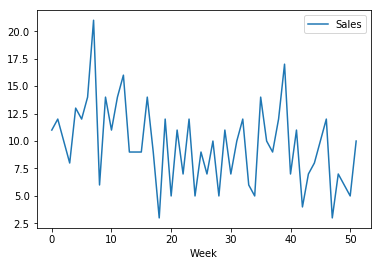

In [46]:
SALES_DATA[SALES_DATA['Product_Code'] == 1].set_index('Week')[['Sales']].plot()

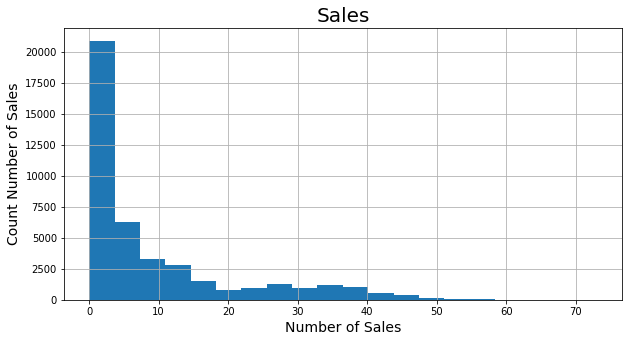

In [8]:
SALES_DATA['Sales'].hist(bins=20, figsize=(10,5))
plt.xlabel('Number of Sales',fontsize=14)
plt.ylabel('Count Number of Sales',fontsize=14)
plt.title('Sales',fontsize=20)
plt.show()